## Ejercicios realizados - Laboratorio 02 - Inteligencia Artificial 2025


<small>Integrantes:

1. Xavier López
2. Gerson Ramirez
3. Madeline Castro  
   </small>


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

#### Ejercicio 01


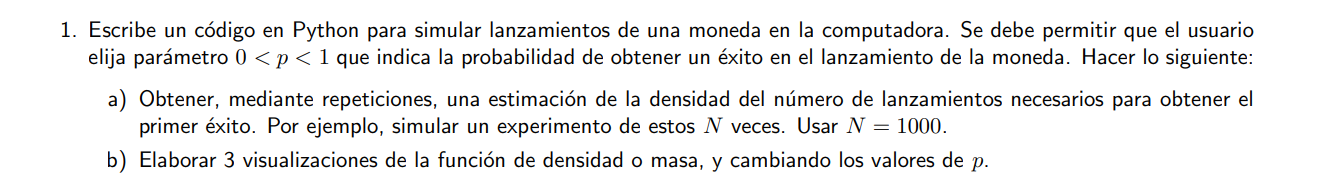


Estimación de la densidad para el primer éxito (p = 0.3)


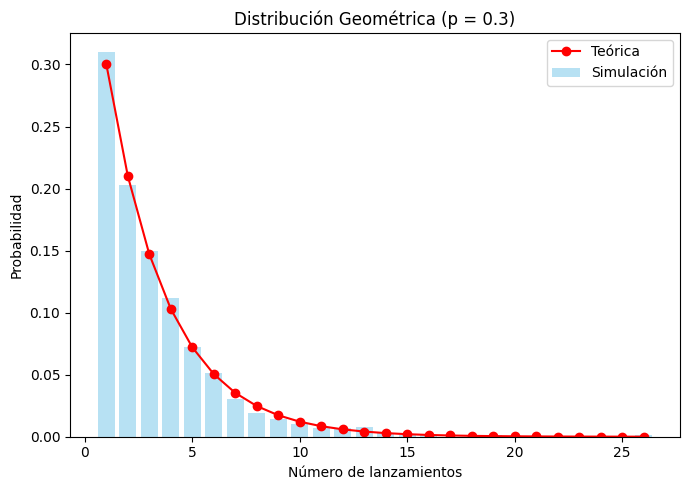

Visualización de la densidad del número de lanzamientos necesarios para obtener el primer éxito para diferentes valores de p


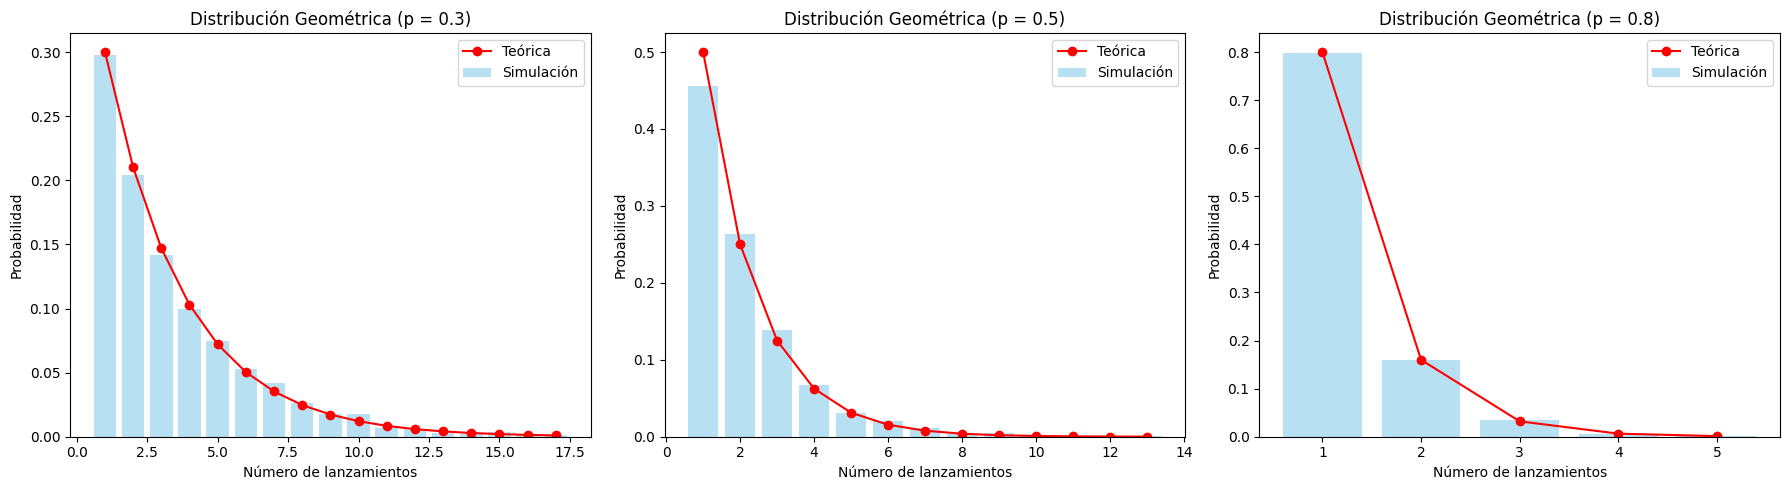

In [ ]:
def simular_lanzamientos(p, N):
    """
    Simula N experimentos en los que se lanzan
    una moneda con probabilidad de éxito p hasta obtener el primer éxito.
    Devuelve una lista con el número de lanzamientos requeridos en cada experimento.
    """
    resultados = []
    for _ in range(N):
        cuenta = 0
        # Se lanza hasta obtener éxito
        while True:
            cuenta += 1 
            if random.random() < p: 
                resultados.append(cuenta) 
                break
    return resultados

def graficar_pmf(resultados, p, N, ax):
    """
    Grafica la función de masa (PMF) estimada a partir de la simulación y la PMF teórica
    de la distribución geométrica.
    """
    # Se calcula el histograma (frecuencia relativa) de los resultados
    valores, frecuencias = np.unique(resultados, return_counts=True) 
    pmf_simulada = frecuencias / N 
    
    # Gráfica de barras para la PMF simulada
    ax.bar(valores, pmf_simulada, alpha=0.6, color='skyblue', label='Simulación')
    
    # Se genera la PMF teórica de la distribución geométrica:
    # f(k) = p * (1-p)^(k-1) para k = 1, 2, 3, ..., max(resultados)
    k_vals = np.arange(1, max(valores) + 1)
    pmf_teorica = p * (1 - p) ** (k_vals - 1)
    ax.plot(k_vals, pmf_teorica, 'ro-', label='Teórica')
    
    # Configuración de la gráfica
    ax.set_xlabel("Número de lanzamientos")
    ax.set_ylabel("Probabilidad")
    ax.set_title(f"Distribución Geométrica (p = {p})")
    ax.legend()

if __name__ == '__main__':
    N = 1000  # Número de experimentos indicado en el enunciado

    # Parte a): Pedir al usuario que ingrese la probabilidad p y graficar en base a ello
    try:
        p_usuario = float(input("Ingresa la probabilidad de éxito (0 < p < 1): "))
    except ValueError:
        print("Debes ingresar un número.")
        exit()
        
    if not (0 < p_usuario < 1):
        print("El valor de p debe estar entre 0 y 1 (exclusivo).")
        exit()
    
    # Simulación para el valor de p ingresado por el usuario
    resultados_usuario = simular_lanzamientos(p_usuario, N)
    
    # Crea una figura para graficar la PMF simulada y la teórica para p ingresado
    print(f"Estimación de la densidad para el primer éxito (p = {p_usuario})")
    fig1, ax1 = plt.subplots(figsize=(7, 5)) 
    graficar_pmf(resultados_usuario, p_usuario, N, ax1) 
    plt.tight_layout() # Ajusta los elementos de la gráfica para que no se superpongan
    plt.show()
    
    # Parte b): Visualizaciones para tres valores de p diferentes
    p_valores = [0.3, 0.5, 0.8]  # Valores de p para los que se simularán los experimentos
    fig2, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, p_val in enumerate(p_valores):
        # Simula N experimentos para el valor de p correspondiente
        resultados = simular_lanzamientos(p_val, N)
        graficar_pmf(resultados, p_val, N, axes[i])
    
    print("Visualización de la densidad del número de lanzamientos necesarios para obtener el primer éxito para diferentes valores de p")
    plt.tight_layout()
    plt.show()